In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt
import pylab as plt

In [2]:
mldemanda_ori = pd.read_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior.csv')


mldemanda = mldemanda_ori.copy()

In [3]:
mldemanda.head()

,id,fecha,pais_de_residencia,provincia_de_espana,ciudad_residencia,situacion_en_espana,profesion,autonomia_economica,familia_edades,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo
0,NaN,2023-03-01,España,Cantabria,Santander,Tengo nacionalidad española / de un país de la...,Atención al cliente,NaN,30 - 24 - 2,No,Si,No,NaN,NaN,NaN,NaN
1,U-000002,2020-10-26,España,NaN,Algeciras,Tengo nacionalidad española / de un país de la...,Comercio internacional,3 meses,"37,37",Si,Si,No,Hasta 300€,Primera residencia,Pueblos de Zaragoza,3 meses
2,U-000003,2020-10-26,España,NaN,Colmenar Viejo (Madrid),Tengo nacionalidad española / de un país de la...,Dependiente,NaN,"57, 56",Si,Si,Si,Hasta 450€,Segunda residencia,Sierra norte de Madrid,Aún me lo estoy pensando
3,U-000006,2020-11-08,España,NaN,San Fernando de Henares,Tengo nacionalidad española / de un país de la...,Sanitario,NaN,"38, 38 y 8",Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,3 meses
4,U-000007,2020-11-11,España,NaN,Madrid,Tengo nacionalidad española / de un país de la...,Fotógrafo,6 meses,41 y 31 años,Si,Si,Si,Hasta 450€,Primera residencia,Sierra norte de Madrid,6 meses


In [4]:
mldemanda.fillna({'id':'U-000001'}, inplace=True)

In [5]:
# Convertimos la columna de fecha a tipo datetime
mldemanda['fecha'] = pd.to_datetime(mldemanda['fecha'])


In [6]:
#creamos un df con las variables que nos interesan para predecir: fecha e id para poder contar el numero de solicitudes por fecha

In [7]:
df_pred = mldemanda[['id', 'fecha']]

In [8]:
df_pred.head()

,id,fecha
0,U-000001,2023-03-01
1,U-000002,2020-10-26
2,U-000003,2020-10-26
3,U-000006,2020-11-08
4,U-000007,2020-11-11


In [9]:
df_pred = df_pred.groupby('fecha')['id'].nunique()

df_pred = df_pred.reset_index(name='num_solicitudes')


df_pred.head()

,fecha,num_solicitudes
0,2020-05-22,12
1,2020-05-29,1
2,2020-05-30,1
3,2020-05-31,2
4,2020-06-01,5


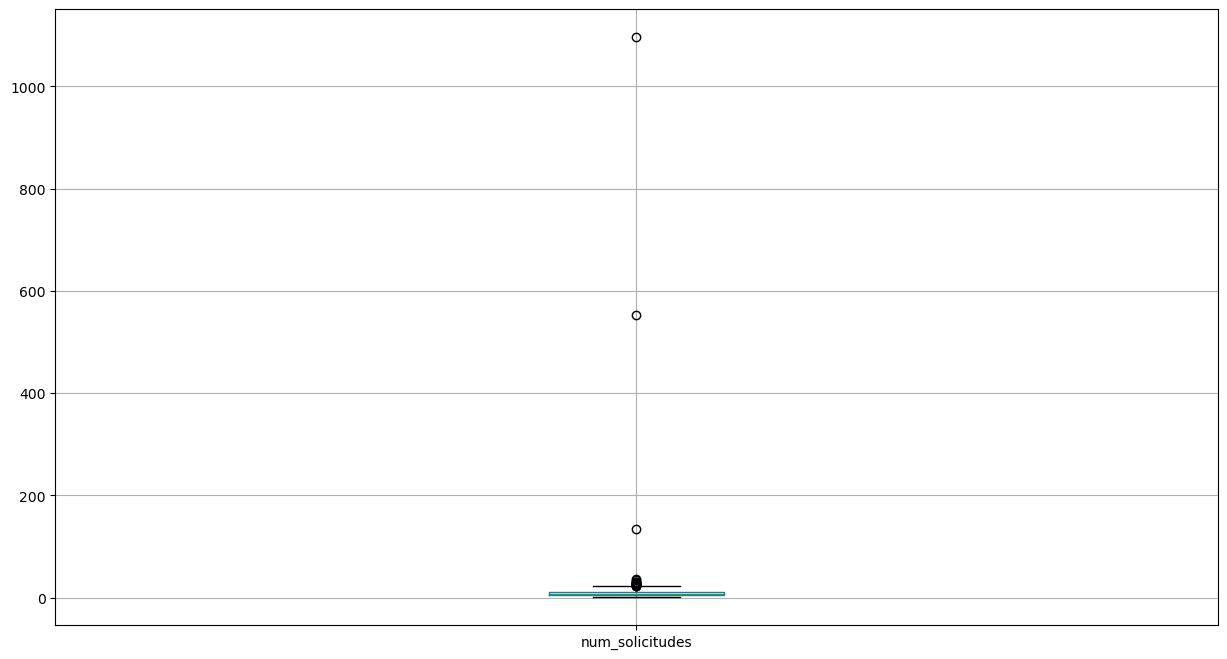

In [10]:
df_pred[['num_solicitudes']].boxplot(figsize=(15, 8));

In [11]:
df_pred.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
fecha,978,978,2020-05-22,1,2020-05-22,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_solicitudes,978.0,NaN,NaT,NaN,NaT,NaT,10.856851,39.423506,1.0,5.0,8.0,12.0,1096.0


In [12]:
df_pred.num_solicitudes.plot();

In [13]:
df_pred.num_solicitudes.max() , df_pred.num_solicitudes.min()

(1096, 1)

In [14]:
fechas_duplicadas = df_pred.loc[df_pred.fecha.duplicated(), 'fecha'].unique()
fechas_duplicadas

array([], dtype='datetime64[ns]')

In [15]:
fila_max_solicitudes = df_pred.loc[df_pred['num_solicitudes'].idxmax()]
fila_max_solicitudes

fecha              2020-06-24 00:00:00
num_solicitudes                   1096
Name: 27, dtype: object

In [16]:
df_pred = df_pred.drop(df_pred['num_solicitudes'].idxmax())


In [17]:
df_pred.num_solicitudes.plot();

In [18]:
df_pred.num_solicitudes.max() , df_pred.num_solicitudes.min()

(553, 1)

In [19]:
fila_max_solicitudes = df_pred.loc[df_pred['num_solicitudes'].idxmax()]
fila_max_solicitudes

fecha              2020-06-14 00:00:00
num_solicitudes                    553
Name: 17, dtype: object

In [20]:
df_pred = df_pred.drop(df_pred['num_solicitudes'].idxmax())

In [21]:
df_pred.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
fecha,976,976,2020-05-22,1,2020-05-22,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_solicitudes,976.0,NaN,NaT,NaN,NaT,NaT,9.189549,6.740458,1.0,5.0,8.0,12.0,135.0


In [22]:
fila_max_solicitudes = df_pred.loc[df_pred['num_solicitudes'].idxmax()]
fila_max_solicitudes

fecha              2020-06-10 00:00:00
num_solicitudes                    135
Name: 13, dtype: object

In [23]:
df_pred = df_pred.drop(df_pred['num_solicitudes'].idxmax())

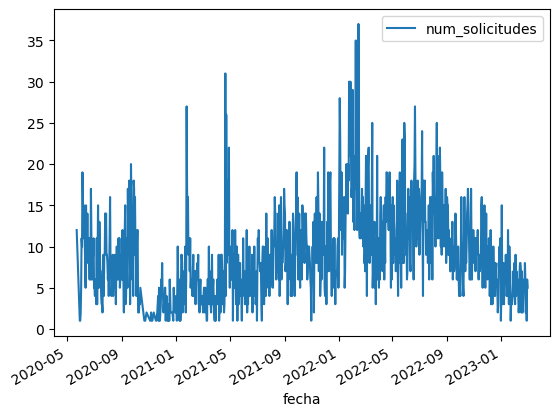

In [27]:
df_pred.plot(x='fecha', y='num_solicitudes')
plt.show()

In [31]:
#ahora que no tenemos outliers causados por problemas en los registros de la información, intentaremos crear un modelo predictivo:

df_pred=df_pred.set_index('fecha')
df_pred.head()

,num_solicitudes
fecha,
2020-05-22,12
2020-05-29,1
2020-05-30,1
2020-05-31,2
2020-06-01,5


In [32]:
from pandas.plotting import lag_plot

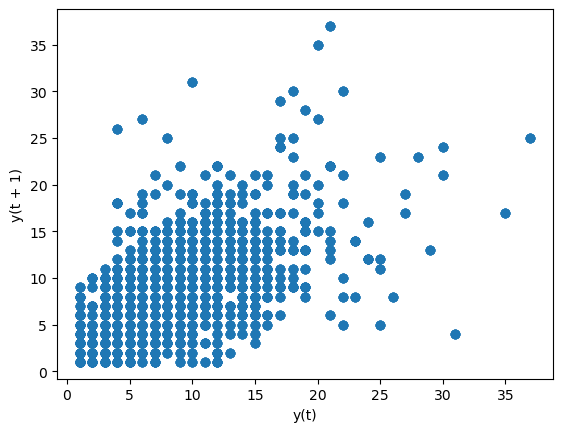

In [38]:
lag_plot(df_pred.num_solicitudes);
plt.show()

In [ ]:
#parece que tiene mayor relación cuando las solicitudes son pocas y se dispersa más cuantas más hay. Esto puede deberse a que no están acostumbrados a recibir muchas solicutudes.

In [39]:
# AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [40]:
train, test = df_pred.num_solicitudes[:-10], df_pred.num_solicitudes[-10:]

train.shape, test.shape

((965,), (10,))

In [41]:
modelo=AR(train, lags=1).fit()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
len(train), len(df_pred.num_solicitudes)-1   # por indice para predecir

(965, 974)

In [44]:
pred=modelo.predict(len(train), len(df_pred.num_solicitudes)-1)

len(pred)

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


10

In [45]:
pred

965    5.804159
966    7.317287
967    8.133772
968    8.574349
969    8.812084
970    8.940367
971    9.009588
972    9.046940
973    9.067095
974    9.077971
dtype: float64

In [46]:
import statsmodels.api as sm

In [48]:
df_pred.iloc[0], df_pred.iloc[-1]

(num_solicitudes    12
 Name: 2020-05-22 00:00:00, dtype: int64,
 num_solicitudes    5
 Name: 2023-03-01 00:00:00, dtype: int64)

In [58]:
# Ajusta un modelo de regresión de Poisson
model = sm.GLM(df_pred, sm.add_constant(df_pred.index.dayofweek), family=sm.families.Poisson())
results = model.fit()

# Hacer predicciones en un rango de fechas futuras
future_dates = pd.date_range(start='2020-05-22', end='2023-05-01')
future_weekdays = future_dates.dayofweek
predictions = results.get_prediction(sm.add_constant(future_weekdays))
predicted_values = predictions.summary_frame()['mean']

predicted_values_rounded = predicted_values.round().astype(int)

predicted_values_rounded


0        9
1        8
2        8
3       11
4       10
5       10
6        9
7        9
8        8
9        8
10      11
11      10
12      10
13       9
14       9
15       8
16       8
17      11
18      10
19      10
20       9
21       9
22       8
23       8
24      11
25      10
26      10
27       9
28       9
29       8
30       8
31      11
32      10
33      10
34       9
35       9
36       8
37       8
38      11
39      10
40      10
41       9
42       9
43       8
44       8
45      11
46      10
47      10
48       9
49       9
50       8
51       8
52      11
53      10
54      10
55       9
56       9
57       8
58       8
59      11
60      10
61      10
62       9
63       9
64       8
65       8
66      11
67      10
68      10
69       9
70       9
71       8
72       8
73      11
74      10
75      10
76       9
77       9
78       8
79       8
80      11
81      10
82      10
83       9
84       9
85       8
86       8
87      11
88      10
89      10
90       9

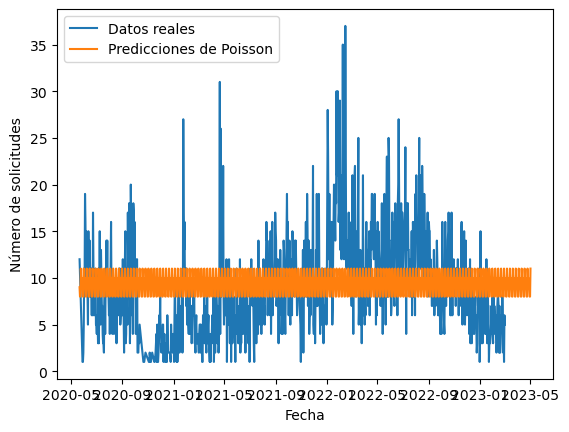

In [59]:
# Graficar los datos reales
plt.plot(df_pred.index, df_pred['num_solicitudes'], label='Datos reales')

# Graficar las predicciones del modelo de regresión de Poisson
plt.plot(future_dates, predicted_values_rounded, label='Predicciones de Poisson')

# Configurar la leyenda y los ejes
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Número de solicitudes')

# Mostrar la gráfica
plt.show()